<a href="https://colab.research.google.com/github/RajkumarGalaxy/rajkumar_nltk/blob/master/Heap's_Law.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Establishment of Heap's Law and its validation

### Jupyter Notebook on NLP using *nltk* platform

#### By [Rajkumar Lakshmanamoorthy](https://github.com/RajkumarGalaxy)

### Heap's Law :     M = k * (T^b)
where

*   M = Vocabulary count in document
*   T = Token count in document
*   k = proportionality constant such that 30<=k<=100
*   b = constant, approximately equal to 0.49



### *Let's Python*

Import libraries

In [32]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

Download document from corpus

In [33]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [34]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Extract words by tokenization, preprocess, remove stopwords

In [35]:
stop = set(nltk.corpus.stopwords.words('english'))
words = nltk.Text(nltk.corpus.gutenberg.words('austen-emma.txt'))

words = [i.lower() for i in words if i.isalpha() and i not in stop]

Calculate token count and actual vocabulary count


In [36]:
v = len(set(words))
t = len(words)

print('Actual Vocabulary count is {} and Token count is {}'.format(v,t))

Actual Vocabulary count is 7045 and Token count is 81421


In [37]:
df = pd.DataFrame(columns=['constant k', 'Predicted Vocabulary', 'Actual Vocabulary' ])

b=0.49            #  power constant
for i, k in enumerate(np.arange(20,110,10)):
  df.loc[i] = [k, k*t**b, v]

print(df)

   constant k  Predicted Vocabulary  Actual Vocabulary
0        20.0           5096.720846             7045.0
1        30.0           7645.081269             7045.0
2        40.0          10193.441692             7045.0
3        50.0          12741.802114             7045.0
4        60.0          15290.162537             7045.0
5        70.0          17838.522960             7045.0
6        80.0          20386.883383             7045.0
7        90.0          22935.243806             7045.0
8       100.0          25483.604229             7045.0


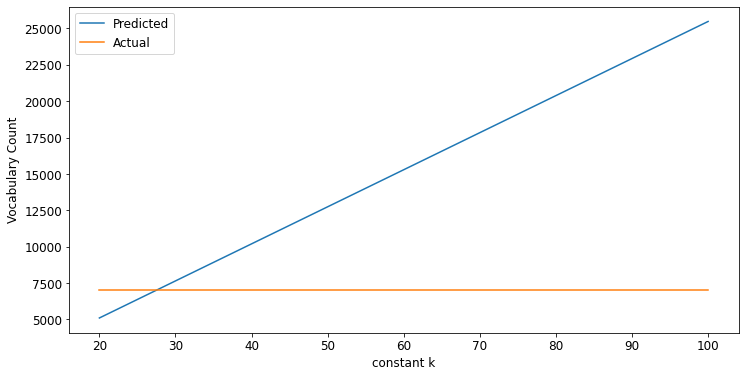

In [38]:
rcParams.update({'figure.figsize':[12,6], 'font.size':12})
sns.lineplot(x=df['constant k'], y=df['Predicted Vocabulary'], label ='Predicted')
sns.lineplot(x=df['constant k'], y=df['Actual Vocabulary'], label ='Actual')
plt.ylabel('Vocabulary Count')
plt.show()

Calculation of correct value of k for given document

In [39]:
print('Correct value of k is: % .2f' %(v/t**b))

Correct value of k is:  27.65


## Let's check for some other document ***bryant-stories***



Actual Vocabulary count is 3775 and Token count is 24472 



   constant k  Predicted Vocabulary  Actual Vocabulary
0        20.0           2827.991065             3775.0
1        30.0           4241.986598             3775.0
2        40.0           5655.982130             3775.0
3        50.0           7069.977663             3775.0
4        60.0           8483.973196             3775.0
5        70.0           9897.968728             3775.0
6        80.0          11311.964261             3775.0
7        90.0          12725.959793             3775.0
8       100.0          14139.955326             3775.0



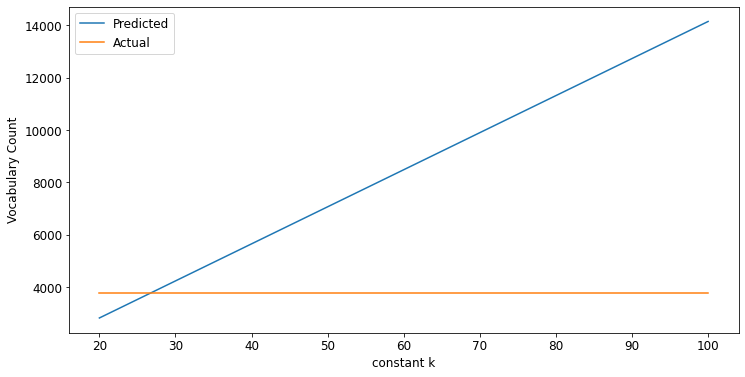



Correct value of k for bryant-stories is:  26.70


In [40]:
stop = set(nltk.corpus.stopwords.words('english'))
words = nltk.Text(nltk.corpus.gutenberg.words('bryant-stories.txt'))

words = [i.lower() for i in words if i.isalpha() and i not in stop]
v = len(set(words))
t = len(words)

print('\n\nActual Vocabulary count is {} and Token count is {} \n\n\n'.format(v,t))
df = pd.DataFrame(columns=['constant k', 'Predicted Vocabulary', 'Actual Vocabulary' ])

b=0.49            #  power constant
for i, k in enumerate(np.arange(20,110,10)):
  df.loc[i] = [k, k*t**b, v]

print(df, end='\n'*2)
rcParams.update({'figure.figsize':[12,6], 'font.size':12})
sns.lineplot(x=df['constant k'], y=df['Predicted Vocabulary'], label ='Predicted')
sns.lineplot(x=df['constant k'], y=df['Actual Vocabulary'], label ='Actual')
plt.ylabel('Vocabulary Count')
plt.show()
print('\n\nCorrect value of k for bryant-stories is: % .2f' %(v/t**b))


## Insight:

Wow! Heap's Law is validated successfully.
However the value of proportionality constant is not in between 30 and 100.
It is around 27 for the given 2 documents

Since we have not tested for a large number of documents or corpora, we cannot really comment on the ***Law*** or its suggested ***constant k*** at present ;)

### Further note:

I tested law with *raw* tokens without *stopwords* removed (not shown in notebook). Then it gives a value lesser than 20 for constant k. 

So we can assume that **Heap's Law** is suitable for *preprocessed* tokens of a document.

Since we just removed stopwords as preprocessing work and didn't concentrate on other methods such as stemming/lemmatization, etc., we can safely assume that constant k may fall in the *said* limit of [30, 100] if properly preprocessed.

Meet later.